## https://jeffersonverissimo.medium.com/naufr%C3%A1gio-do-titanic-uma-an%C3%A1lise-usando-data-science-b6c579033eee 


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
dados_teste = pd.read_csv('test.csv' , sep = ',')
dados_treino = pd.read_csv('train.csv' , sep = ',')

In [42]:
dados_teste.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [43]:
dados_treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
dados_treino.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [45]:
print(dados_teste.columns)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


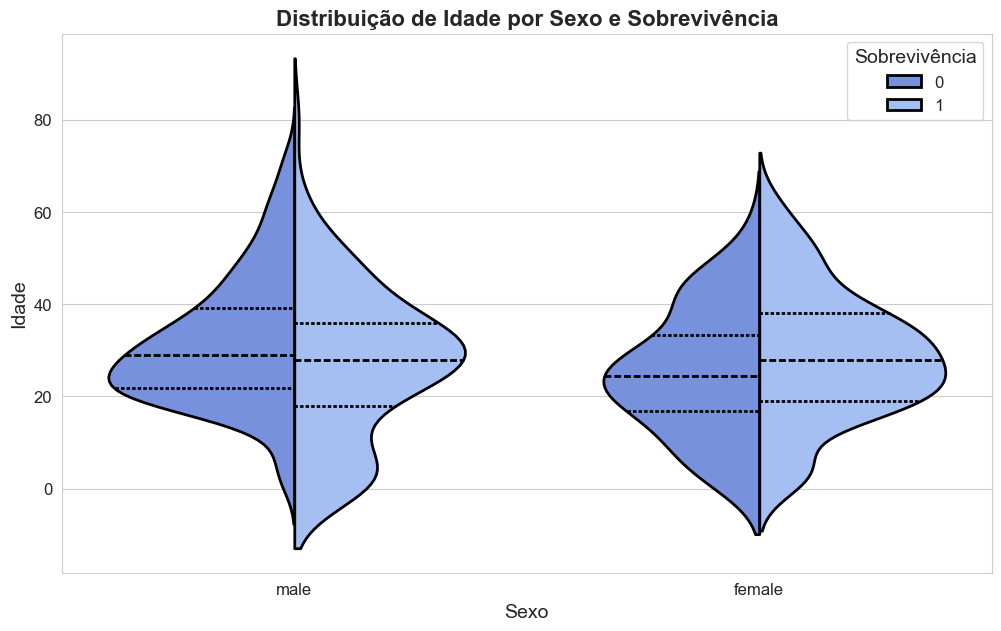

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuração do estilo
sns.set_style("whitegrid")  # Adiciona um fundo mais leve para facilitar a leitura
sns.set_palette("coolwarm")  # Define uma paleta de cores mais intuitiva

# Criando o gráfico aprimorado
plt.figure(figsize=(12,7))
sns.violinplot(x="Sex", y="Age", hue="Survived", data=dados_treino, split=True, 
               inner="quartile", linewidth=2, edgecolor="black")

# Personalizando o gráfico
plt.title("Distribuição de Idade por Sexo e Sobrevivência", fontsize=16, fontweight="bold")
plt.xlabel("Sexo", fontsize=14)
plt.ylabel("Idade", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Ajustando a legenda para melhorar a visualização
plt.legend(title="Sobrevivência", title_fontsize=14, fontsize=12, loc="upper right")

# Exibindo o gráfico aprimorado
plt.show()

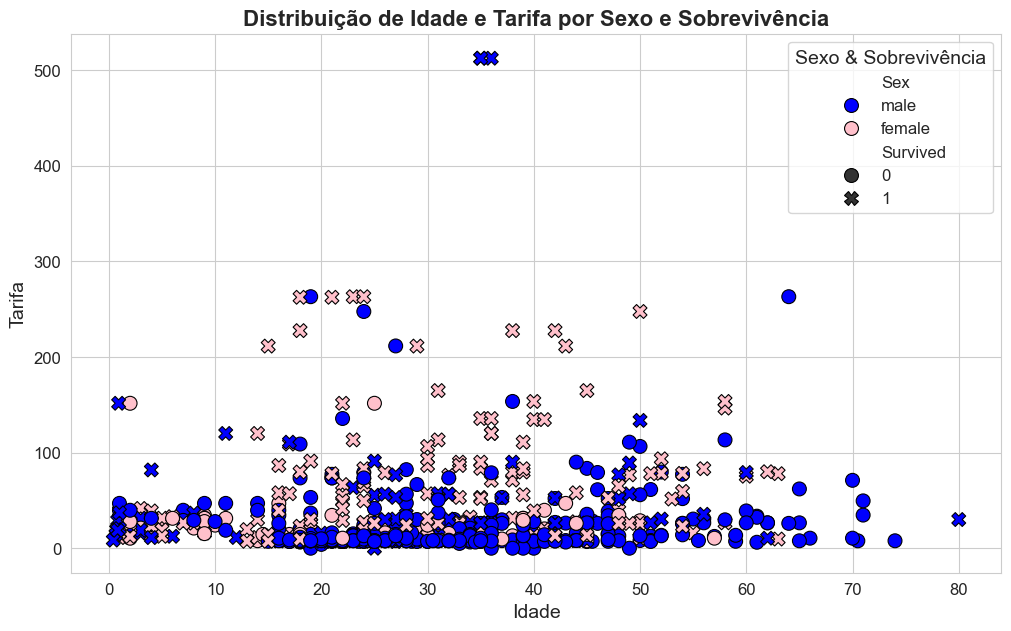

In [47]:
plt

# Configuração do estilo
sns.set_style("whitegrid")

# Criando o gráfico de dispersão
plt.figure(figsize=(12,7))
sns.scatterplot(x="Age", y="Fare", hue="Sex", style="Survived", data=dados_treino,
                palette={"male": "blue", "female": "pink"}, s=100, edgecolor="black")

# Personalizando o gráfico
plt.title("Distribuição de Idade e Tarifa por Sexo e Sobrevivência", fontsize=16, fontweight="bold")
plt.xlabel("Idade", fontsize=14)
plt.ylabel("Tarifa", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Ajustando a legenda
plt.legend(title="Sexo & Sobrevivência", title_fontsize=14, fontsize=12, loc="upper right")

# Exibindo o gráfico aprimorado

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [49]:
print("Valores nulos no conjunto de teste:")
print(dados_teste.isnull().sum())

Valores nulos no conjunto de teste:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [50]:
print(dados_treino.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [51]:

# 1. Preencher valores nulos nas colunas 'Age' e 'Embarked'
dados_treino['Age'] = dados_treino['Age'].fillna(dados_treino['Age'].median())
dados_treino['Embarked'] = dados_treino['Embarked'].fillna(dados_treino['Embarked'].mode()[0])

dados_teste['Age'] = dados_teste['Age'].fillna(dados_teste['Age'].median())
dados_teste['Embarked'] = dados_teste['Embarked'].fillna(dados_teste['Embarked'].mode()[0])

# 2. Codificar variáveis categóricas com get_dummies
dados_treino = pd.get_dummies(dados_treino, columns=['Sex', 'Embarked'], drop_first=True)
dados_teste = pd.get_dummies(dados_teste, columns=['Sex', 'Embarked'], drop_first=True)

# 3. Garantir que dados_teste tenha as mesmas colunas que dados_treino (exceto 'Survived')
dados_teste = dados_teste.reindex(columns=dados_treino.columns.drop('Survived'), fill_value=0)

# 4. Definir variáveis de entrada (X) e saída (y)
X_train = dados_treino[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 
                        'Sex_male', 'Embarked_Q', 'Embarked_S']]
y_train = dados_treino['Survived']

X_test = dados_teste[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 
                      'Sex_male', 'Embarked_Q', 'Embarked_S']]

# 5. Garantir que não existam valores nulos no X_test (por segurança)
X_test = X_test.fillna(X_test.median())

# 6. Escalar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Treinar o modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# 8. Fazer previsões
y_pred = knn.predict(X_test_scaled)

# 9. Mostrar as previsões
print("Previsões dos passageiros no conjunto de teste:")
print(y_pred)




Previsões dos passageiros no conjunto de teste:
[0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0
 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0
 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 0 0 0 0 1 0 0 1
 0 0 0 1 1 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0
 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 1 0
 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 1 1 1 1 0 1 1 0 1 1]


In [52]:
from sklearn.pipeline import Pipeline

In [53]:
from sklearn.model_selection import cross_val_score

In [54]:
import numpy as np

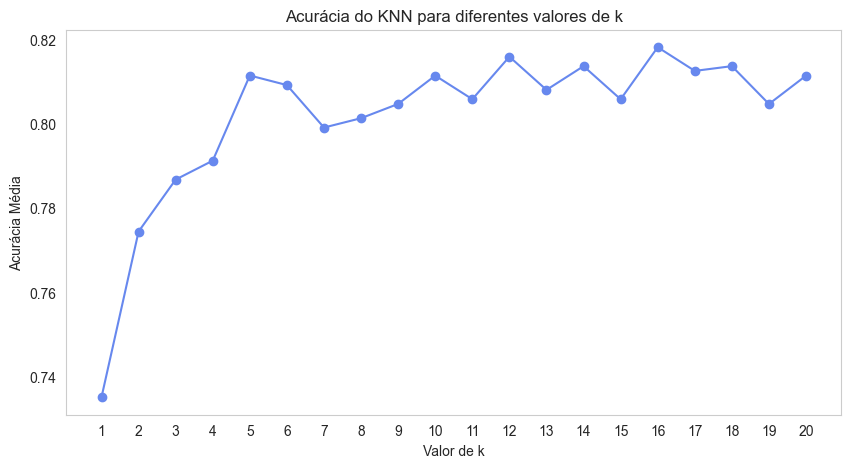

✅ Melhor valor de k encontrado: 16 com acurácia = 0.8182


In [55]:
# Avaliar k de 1 a 20
k_range = range(1, 21)
scores_k = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    pipe = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('modelo', knn)
    ])
    score = cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy').mean()
    scores_k.append(score)

# Plotar
plt.figure(figsize=(10,5))
plt.plot(k_range, scores_k, marker='o')
plt.xlabel('Valor de k')
plt.ylabel('Acurácia Média')
plt.title('Acurácia do KNN para diferentes valores de k')
plt.xticks(k_range)
plt.grid()
plt.show()

# Melhor k
melhor_k = k_range[np.argmax(scores_k)]
print(f"✅ Melhor valor de k encontrado: {melhor_k} com acurácia = {max(scores_k):.4f}")


In [57]:
knn = KNeighborsClassifier(n_neighbors=16)

In [ ]:
##893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7,,S

In [58]:
import pickle

with open('modelo_titanic.pkl', 'wb') as file:
    pickle.dump(knn, file)